In [234]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout,Input
from sklearn.model_selection import train_test_split


# Read Dataset 

In [235]:
df=pd.read_csv('2023_nba_player_stats.csv')

In [236]:
df.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [237]:
df.tail()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
534,Alondes Williams,NaN,BKN,23,1,1,0,5.3,0,0,...,1,0,2,0,0,1,-1,0,0,-5
535,Deonte Burton,NaN,SAC,29,2,1,1,6.5,0,0,...,0,0,0,0,0,0,0,0,0,5
536,Frank Jackson,NaN,UTA,24,1,0,1,5.0,0,0,...,2,1,0,0,0,0,4,0,0,-2
537,Michael Foster Jr.,NaN,PHI,20,1,1,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,-2
538,Sterling Brown,NaN,LAL,28,4,2,2,24.4,0,0,...,8,2,0,3,0,4,22,0,0,-4


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [239]:
df.isnull().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

In [240]:
df.rename(columns={
    'PName': 'Player_Name',
    'POS': 'Position',
    'Team': 'Team_Abbreviation',
    'Age': 'Age',
    'GP': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'Min': 'Minutes_Played',
    'PTS': 'Total_Points',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage',
    '3PM': 'Three_Point_FG_Made',
    '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage',
    'FTM': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'TOV': 'Turnovers',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'FP': 'NBA_Fantasy_Points',
    'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles',
    '+/-': 'Plus_Minus'
}, inplace=True)

In [241]:
df['Position'].describe()

count     534
unique      7
top        SG
freq       96
Name: Position, dtype: object

In [242]:
df['Position'].fillna('SG',inplace=True)

In [243]:
df.tail()

,Player_Name,Position,Team_Abbreviation,Age,Games_Played,Wins,Losses,Minutes_Played,Total_Points,Field_Goals_Made,...,Total_Rebounds,Assists,Turnovers,Steals,Blocks,Personal_Fouls,NBA_Fantasy_Points,Double_Doubles,Triple_Doubles,Plus_Minus
534,Alondes Williams,SG,BKN,23,1,1,0,5.3,0,0,...,1,0,2,0,0,1,-1,0,0,-5
535,Deonte Burton,SG,SAC,29,2,1,1,6.5,0,0,...,0,0,0,0,0,0,0,0,0,5
536,Frank Jackson,SG,UTA,24,1,0,1,5.0,0,0,...,2,1,0,0,0,0,4,0,0,-2
537,Michael Foster Jr.,SG,PHI,20,1,1,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,-2
538,Sterling Brown,SG,LAL,28,4,2,2,24.4,0,0,...,8,2,0,3,0,4,22,0,0,-4


# Data Visualization

In [244]:
import plotly.express as px
px.histogram(df,x='Position',color_discrete_sequence=px.colors.qualitative.Vivid, title='Players position value counts',template='plotly_dark')

In [245]:
import plotly.express as px
px.histogram(df,x='Age',color_discrete_sequence=[ 'green', 'red', 'orange'], title='Players Age value counts',template='plotly_dark')

In [246]:
Total_point_POS=px.scatter(df,x='Position',y='Total_Points',color='Position',template='plotly_dark',
                           title='Total point of Each position')
Total_point_POS.show()
Field_Goal_Percentage=px.scatter(df,x='Age',y='Field_Goal_Percentage',color='Field_Goal_Percentage',template='plotly_dark',title='Total Field Goal Percentage of Each Player Age')
Field_Goal_Percentage.show()
Field_Goal_Percentage=px.scatter(df,x='Age',y='Assists',color='Assists',template='plotly_dark',title='Total Assists of Each Player Age')
Field_Goal_Percentage.show()


In [247]:
Field_Goal_Percentage=px.scatter(df,x='Age',y='Minutes_Played',color='Minutes_Played',template='plotly_dark',title='Total Minutes Played by Each Player Age')
Field_Goal_Percentage.show()

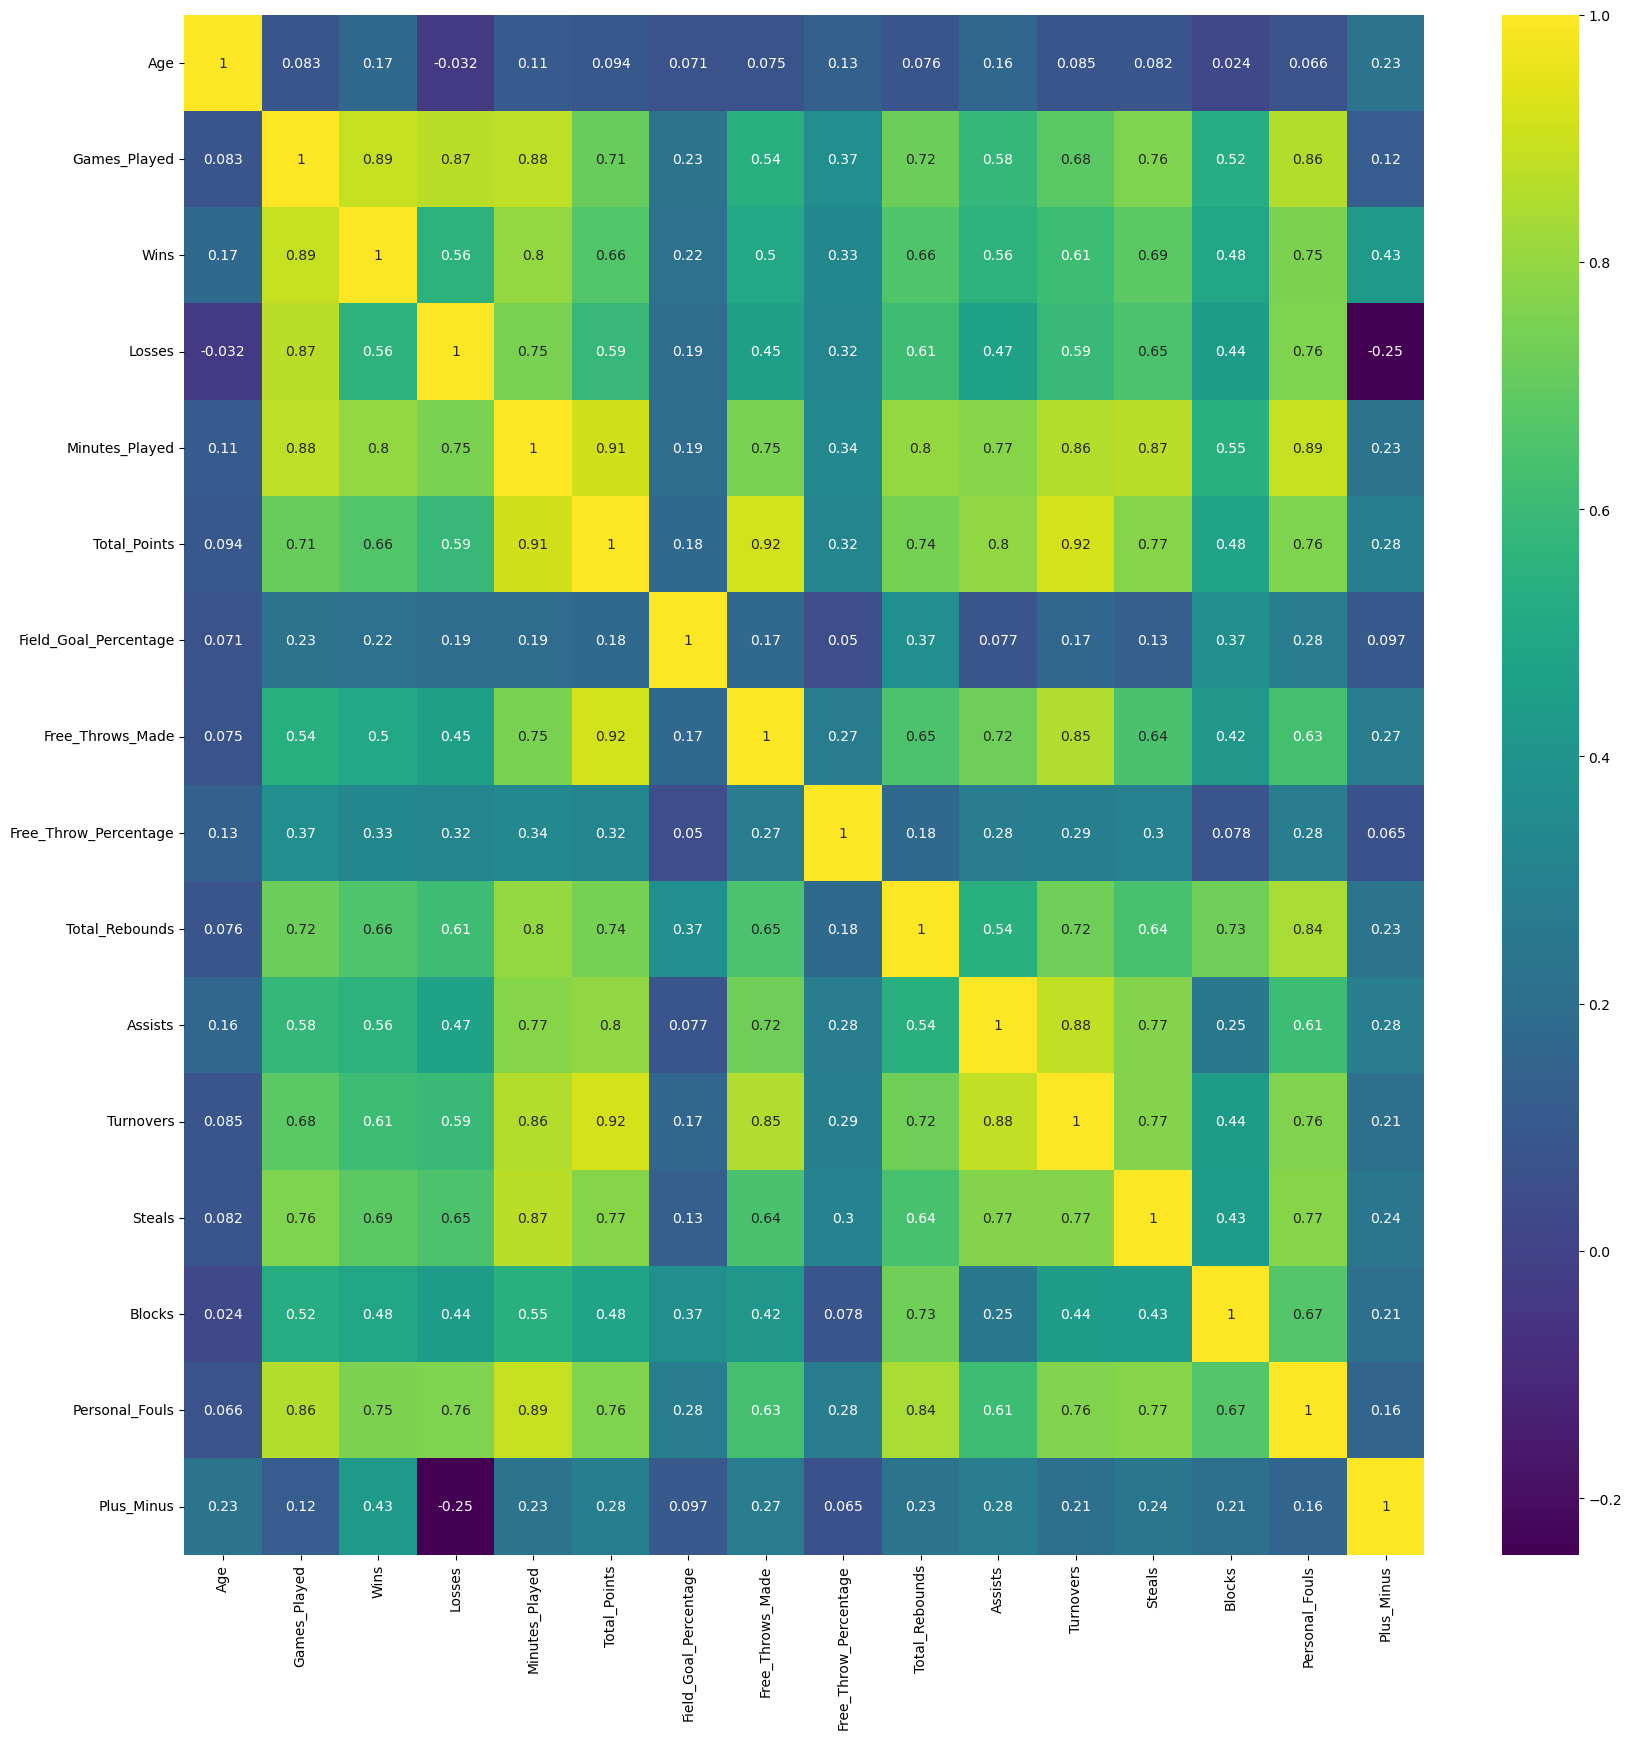

In [271]:
plt.figure(figsize=(20,20))
corelation_matrix_corr=df.corr()
confusion_matrix=sns.heatmap(corelation_matrix_corr,annot=True,cmap="viridis")


# Features

In [249]:
df.drop(columns=['Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made', 'Field_Goals_Attempted', 'Three_Point_FG_Made',
                 'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage', 'NBA_Fantasy_Points', 'Double_Doubles','Free_Throws_Attempted',
                 'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds'],
        inplace=True)

In [250]:
X=df.drop('Total_Points',axis=1)
y=df['Total_Points']

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [252]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((431, 15), (108, 15), (431,), (108,))

# Models

LinearRegression

In [253]:
from sklearn.linear_model import LinearRegression

In [254]:
model=LinearRegression()

In [255]:
model.fit(X_train,y_train)

LinearRegression()

In [256]:
y_pred=model.predict(X_test)

In [257]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score

r2_score(y_test, y_pred)


0.9697888887601366

In [258]:
y_predction=model.predict(X).reshape(-1)

comparison_data=pd.DataFrame({'Actual':y,'Predicted':y_predction})
comparison_data.head()


,Actual,Predicted
0,2225,2160.563791
1,2183,2198.526231
2,2138,1914.537773
3,2135,2082.688973
4,1959,1849.715523


In [259]:
comparison_fig=px.scatter(comparison_data,x='Actual',y='Predicted',template='plotly_dark' ,color='Predicted',title='Comparison Between Actual And Predicted Data')
comparison_fig.show()
comparison_hist=px.histogram(comparison_data,x=['Actual','Predicted'],template='plotly_dark', color_discrete_sequence=['#185ADB', '#FC5C9C'] ,title='Distribution  Between Actual And Predicted Data')
comparison_hist.show()

KNN

In [260]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [261]:
KNN_model=KNeighborsRegressor()

In [262]:
KNN_model.fit(X_train,y_train)

KNeighborsRegressor()

In [263]:
y_pred=KNN_model.predict(X_test)

In [264]:
y_predction=KNN_model.predict(X).reshape(-1)

comparison_data=pd.DataFrame({'Actual':y,'Predicted':y_predction})
comparison_data.head()


,Actual,Predicted
0,2225,1577.6
1,2183,1996.6
2,2138,1754.0
3,2135,1794.4
4,1959,1755.8


In [265]:
comparison_fig=px.scatter(comparison_data,x='Actual',y='Predicted',template='plotly_dark' ,color='Predicted',title='Comparison Between Actual And Predicted Data With KNN')
comparison_fig.show()
comparison_hist=px.histogram(comparison_data,x=['Actual','Predicted'],template='plotly_dark', color_discrete_sequence=['#185ADB', '#FC5C9C'] ,title='Distribution  Between Actual And Predicted Data With KNN')
comparison_hist.show()

Random Forest

In [266]:
RF_model=RandomForestRegressor()

In [267]:
RF_model.fit(X_train,y_train)
y_pred=RF_model.predict(X_test)
y_predction=RF_model.predict(X).reshape(-1)

comparison_data=pd.DataFrame({'Actual':y,'Predicted':y_predction})
comparison_data.head()

,Actual,Predicted
0,2225,1905.78
1,2183,2063.67
2,2138,1803.68
3,2135,2016.76
4,1959,1878.45


In [268]:
comparison_fig=px.scatter(comparison_data,x='Actual',y='Predicted',template='plotly_dark' ,color='Predicted',title='Comparison Between Actual And Predicted Data With Random Forest')
comparison_fig.show()
comparison_hist=px.histogram(comparison_data,x=['Actual','Predicted'],template='plotly_dark', color_discrete_sequence=['#185ADB', '#FC5C9C'] ,title='Distribution  Between Actual And Predicted Data With Random Fores')
comparison_hist.show()

Decision Tree

In [269]:
DT_model=DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
y_pred=DT_model.predict(X_test)
y_predction=DT_model.predict(X).reshape(-1)

comparison_data=pd.DataFrame({'Actual':y,'Predicted':y_predction})
comparison_data.head()

,Actual,Predicted
0,2225,1959.0
1,2183,2183.0
2,2138,1914.0
3,2135,2135.0
4,1959,1959.0


In [270]:
comparison_fig=px.scatter(comparison_data,x='Actual',y='Predicted',template='plotly_dark' ,color='Predicted',title='Comparison Between Actual And Predicted Data With Decision Tree ')
comparison_fig.show()
comparison_hist=px.histogram(comparison_data,x=['Actual','Predicted'],template='plotly_dark', color_discrete_sequence=['#185ADB', '#FC5C9C'] ,title='Distribution  Between Actual And Predicted Data With Decision Tree')
comparison_hist.show()